# Aula 12 - Aprendizagem não-supervisionada & k-means

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Aprendizagem não-supervisionada
- 2) K-means
- 3) Exemplo real

In [86]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

____
____
_____

## 1) Aprendizagem não-supervisionada

Chegamos ao nosso último tópico do módulo: **aprendizagem não-supervisionada (unsurpervised learning)**.

Este tipo de aprendizagem se diferencia da aprendizagem supervisionada de modo muito simples: **os targets não fazem parte da base de dados!**

> Na aprendizagem não-supervisionada, temos acesso apenas ao conjunto de features, $\{\vec{x}_i\}_{i=1}^N$

A perda que temos com relação à aprendizagem supervisionada é gigante: sem os targets, torna-se impossível a estimação do processo teórico $\mathcal{F}$ que gerou os dados!

Assim, o máximo que podemos fazer na aprendizagem não-supervisionada é a **determinação de estrutura nos dados**:

<img src=https://www.researchgate.net/profile/Zhenyu-Wen-2/publication/336642133/figure/fig3/AS:815304842170368@1571395230317/Examples-of-Supervised-Learning-Linear-Regression-and-Unsupervised-Learning.png width=500>

Para muitas aplicações, isso já é suficiente: basta saber que os dados estão estruturados (agrupados/segmentados), sendo o significado de cada grupo/segmento de menor interesse, ou facilmente estimado de outra forma; ou, então, determinar aspectos importantes das features por si só, sem qualquer preocupação com o target.

Neste curso, veremos dois grandes grupos de **técnicas não-supervisionadas**:

- Clusterização - forma de encontrar grupos (clusters) nos dados;
- Redução de dimensionalidade - importante processo de pré-processamento que visa reduzir o número de dimensões (features) de um dataset.

Na aula de hoje, veremos técnicas de clusterização!

______

### Clusterização

Este tipo de problema consiste em __agrupar__ itens semelhantes, isto é, criar __grupos__ (ou __clusters__) dos dados que são parecidos entre si.

> O objetivo central é **dividir os dados em grupos distintos**, tais que **membros de cada grupo sejam similares entre si**

Problemas como estes podem aparecer em diversos contextos:

- Identificação de tipos de clientes parecidos, para o direcionamento de marketing;
- Agrupamento de cidades próximas para melhor logística de entrega de produtos;
- Identificação de padrões climáticos;
- Identificação de genes relacionados à determinada doença;
- Identificação de documentos semelhantes em processos legais;

...e qualquer outro problema em que você deseje **agrupar dados similares** ou ainda **encontrar alguma estrutura nos seus dados!**, mas tudo isso no que diz respeito ùnicamente **às features**!

Veremos agora um dos principais algoritmos de clusterização, o **k-means**



___
___
___

## 2) K-means

Documentação: [clique aqui!](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

O k-means é utilizado para a determinação de um número **$k$ de clusters em nossos dados** (na parte 2.3 explicamos melhor como este algoritmo funciona!)

O primeiro passo pra aplicar o $k$-means é:

- Determinar o número $k$ de clusters!

Por exemplo, só de olhar pros dados plotados a seguir, fica fácil de identificar 4 grupos distintos, não é mesmo? 

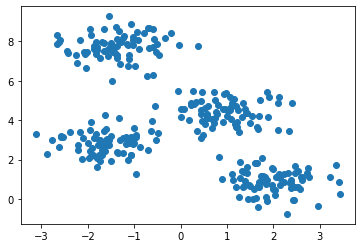

In [87]:
# geracao dos dados
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=300, n_features=2, centers=4, cluster_std=0.60, random_state=0)

plt.scatter(X[:,0], X[:,1])

In [88]:
# dando uma olhada em X

X

array([[ 8.36856841e-01,  2.13635938e+00],
       [-1.41365810e+00,  7.40962324e+00],
       [ 1.15521298e+00,  5.09961887e+00],
       [-1.01861632e+00,  7.81491465e+00],
       [ 1.27135141e+00,  1.89254207e+00],
       [ 3.43761754e+00,  2.61654166e-01],
       [-1.80822253e+00,  1.59701749e+00],
       [ 1.41372442e+00,  4.38117707e+00],
       [-2.04932168e-01,  8.43209665e+00],
       [-7.11099611e-01,  8.66043846e+00],
       [-1.71237268e+00,  2.77780226e+00],
       [-2.67000792e+00,  8.35389140e+00],
       [ 1.24258802e+00,  4.50399192e+00],
       [-2.22783649e+00,  6.89479938e+00],
       [ 1.45513831e+00, -2.91989981e-02],
       [ 4.53791789e-01,  3.95647753e+00],
       [ 1.06923853e+00,  4.53068484e+00],
       [ 2.56936589e+00,  5.07048304e-01],
       [-1.06690610e+00,  3.13165795e+00],
       [-1.07859101e+00,  2.20451529e+00],
       [ 2.71506328e+00,  1.29082190e+00],
       [ 1.77710994e+00,  1.18655254e+00],
       [ 7.34363910e-01,  5.03725437e+00],
       [-1.


Mas, como o computador pode identificar estes grupos? É isso que o algoritmo responde!

Uma vez determinado o número k de clusters, podemos construir nosso modelo!

### Construindo o modelo

Note que temos apenas as **features** dos dados (no caso, $x_1$ e $x_2$). Iso caracteriza um problema de clusterização **não-supervisionado**: quando nossos dados **não têm targets**, apenas features!

In [89]:
# 1) - importando a classe Kmeans do sklearn

from sklearn.cluster import KMeans

Temos vários argumentos na classe, mas os principais são:

>- n_clusters: quantos clusters queremos (o número k);

>- max_iter: é o número máximos de iterações que o algoritmo fará, se ele não convergir antes disso. É uma boa ideia não colocar um número tão grande, ou o algoritmo pode ficar bem lento. Algo da ordem de 1000, em geral é uma boa escolha.

Por fim, pra fitar o modelo, fazemos:

In [90]:
# 2) instanciando o modelo
# use k = 4

estimador = KMeans(n_clusters=4, max_iter=1000)

Em algoritmos **não supervisionados**, não existe a divisão em dados de treino e dados de teste, porque **não há o que testar!**. Queremos apenas **econtrar estrutura** nos dados!

Então, basta fitar o modelo com nossos dados todos (no caso, o array X)

In [91]:
# 3) e 4) treinando o modelo

modelo = estimador.fit(X)

Agora que o modelo está treinado, podemos fazer predições:


In [92]:
# 5) fazendo previsões

modelo.labels_

array([1, 0, 3, 0, 1, 1, 2, 3, 0, 0, 2, 0, 3, 0, 1, 3, 3, 1, 2, 2, 1, 1,
       3, 2, 2, 3, 1, 3, 2, 3, 0, 0, 3, 0, 0, 0, 0, 0, 2, 1, 3, 2, 3, 3,
       2, 2, 0, 2, 0, 1, 2, 1, 0, 1, 1, 2, 0, 2, 0, 1, 0, 3, 0, 2, 2, 2,
       0, 1, 0, 2, 3, 2, 0, 2, 2, 0, 2, 3, 1, 0, 1, 3, 1, 1, 0, 3, 1, 3,
       0, 0, 3, 1, 0, 2, 2, 3, 1, 1, 3, 2, 0, 1, 0, 1, 3, 1, 1, 3, 0, 3,
       2, 2, 1, 0, 1, 3, 0, 1, 1, 3, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 0, 2,
       2, 1, 0, 2, 2, 0, 3, 0, 0, 2, 3, 2, 3, 2, 0, 3, 0, 0, 0, 3, 0, 3,
       1, 2, 0, 2, 1, 3, 0, 3, 3, 1, 3, 2, 2, 3, 1, 3, 3, 0, 1, 3, 2, 0,
       1, 1, 3, 2, 1, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 2, 3, 3, 2, 2, 2, 3,
       2, 0, 3, 2, 1, 2, 3, 0, 2, 0, 3, 0, 3, 2, 3, 3, 0, 2, 2, 1, 1, 3,
       0, 1, 1, 2, 1, 2, 3, 0, 0, 3, 3, 0, 3, 1, 2, 3, 1, 2, 0, 2, 1, 3,
       1, 0, 0, 0, 0, 2, 2, 0, 3, 2, 1, 3, 2, 2, 2, 1, 1, 0, 3, 3, 2, 1,
       0, 2, 3, 0, 3, 1, 1, 2, 2, 3, 1, 1, 1, 3, 0, 0, 1, 1, 3, 1, 1, 1,
       0, 2, 0, 3, 1, 1, 0, 0, 0, 1, 1, 3, 0, 2])

In [93]:
labels = modelo.predict(X)

Isto retorna uma lista com número de elementos igual ao número de pontos do dataset, e com valores entre 0 e k-1, indicando qual é o número do cluster (a contagem começa com zero). 

No nosso caso, como k = 4, teremos os clusters 0, 1, 2 e 3.

Pra visualizarmos os clusters, basta plotar os dados iniciais com o hue adequado!

In [94]:
pd.DataFrame(X, columns=["x1", "x2"])

,x1,x2
0,0.836857,2.136359
1,-1.413658,7.409623
2,1.155213,5.099619
3,-1.018616,7.814915
4,1.271351,1.892542
...,...,...
295,1.973698,1.579798
296,2.518342,1.391766
297,0.438990,4.535929
298,0.369479,7.791105


In [95]:
pd.Series(labels, name="cluster")

0      1
1      0
2      3
3      0
4      1
      ..
295    1
296    1
297    3
298    0
299    2
Name: cluster, Length: 300, dtype: int32

In [96]:
#aqui eu crio um dataframe com as coordenadas dos pontos ("x1" e "x2"), e com as labels dos clusters

dados_clusterizados = pd.concat([pd.DataFrame(X, columns=["x1", "x2"]), 
                                 pd.Series(labels, name="cluster")], axis=1)

dados_clusterizados

,x1,x2,cluster
0,0.836857,2.136359,1
1,-1.413658,7.409623,0
2,1.155213,5.099619,3
3,-1.018616,7.814915,0
4,1.271351,1.892542,1
...,...,...,...
295,1.973698,1.579798,1
296,2.518342,1.391766,1
297,0.438990,4.535929,3
298,0.369479,7.791105,0


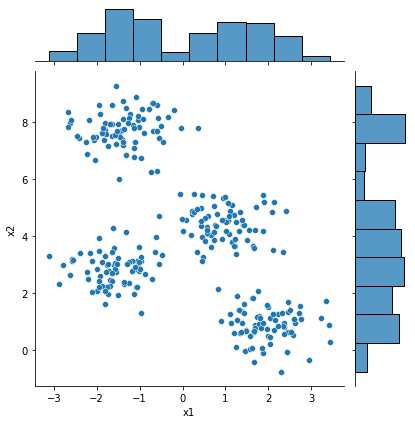

In [97]:
sns.jointplot(data=dados_clusterizados, x="x1", y="x2")

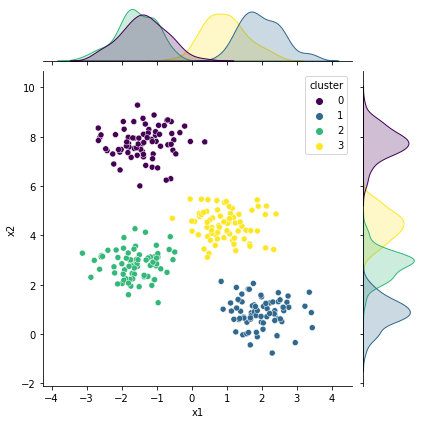

In [98]:
#aqui eu faço o scatterplot/jointplot com o hue

sns.jointplot(data=dados_clusterizados, x="x1", y="x2", hue="cluster", palette="viridis")

In [99]:
modelo.inertia_

212.00599621083472

Na prática, a análise segue de manira qualitativa, inspecionando os clusters individuais:

In [100]:
cluster_2 = dados_clusterizados[dados_clusterizados["cluster"] == 2]

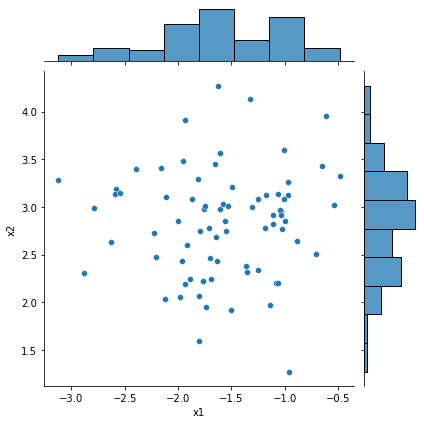

In [101]:
sns.jointplot(data=cluster_2, x="x1", y="x2")

_____

### Determinando o $k$

Mas e se não for tão fácil de plotar os dados para determinar o $k$?

Pode ser que não consigamos visualizar nossos dados em 2D, se, por exemplo, tivermos mais de 2 features em nossos dados...

> Quase sempre, uma boa metodologia para a determinaçãodo número de clusters é **conhecimento do negócio**! Muitas vezes, o próprio problema nos indica a quantidade de clusters que esperamos encontrar!

No entanto, há situações em que o número de clusters não é conhecido a priori.

Neste caso, podemos usar o __método do cotovelo__, que consiste em rodar o k-means várias vezes, para diferentes valores de k, e depois plotar um gráfico com a **inércia** de cada uma das rodadas. 

### Inércia (WCSS) e método do cotovelo

A inércia também é chamada de **WCSS** (Within-Cluster-Sum-of-Squares), isto é, "soma de quadrados intra-cluster", que é calculada como a soma das distâncias (ao quadrado) entre os pontos e os centróides dos clusters.

Quanto menor o WCSS, mais eficiente foi a clusterização, **mas até certo ponto!**

Conforme o número de clusters ($k$) aumenta, o WCSS diminui, sendo mínimo quando cada ponto é seu próprio cluster isolado (o que não é nada útil, pois se cada ponto for um cluster, não há clusterização alguma!).

Assim, o que queremos não é encontrar um $k$ que minimize o WCSS, mas sim um k a partir do qual o WCSS **para de decrescer tão rapidamente!**

Quando encontramos este $k$, encontramos o número ideal de clusters!

Ao plotarmos o WCSS (inércia) em função de $k$, o que buscaremos será então o valor de $k$ onde **o gráfico deixa de ser tão inclinado**. Esses pontos são visualizados como "quinas", ou **cotovelos** no gráfico -- e daí vem o nome do método!

Para aplicar o método, fazemos:
 

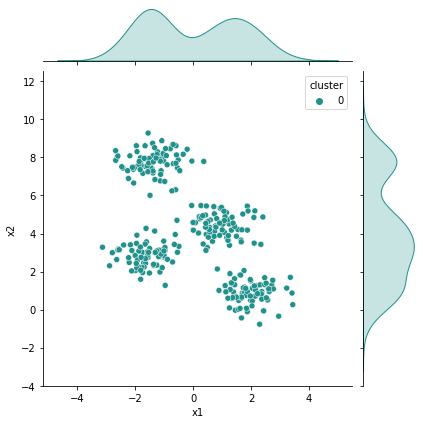


Inercia com k=1: 2812.137595303235






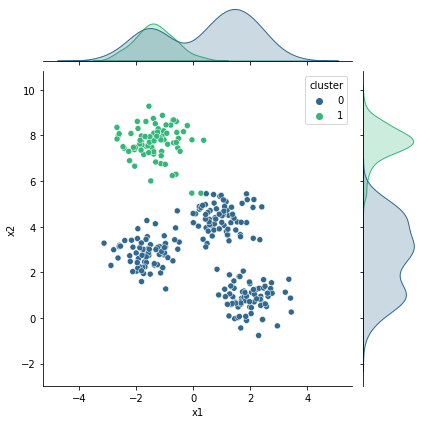


Inercia com k=2: 1190.782359364345






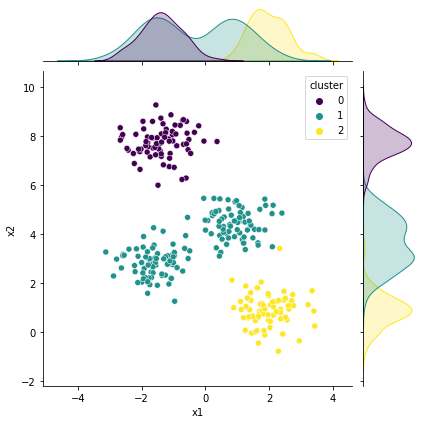


Inercia com k=3: 546.8911504626301






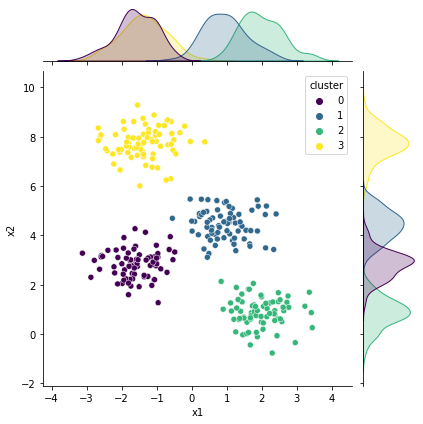


Inercia com k=4: 212.00599621083472






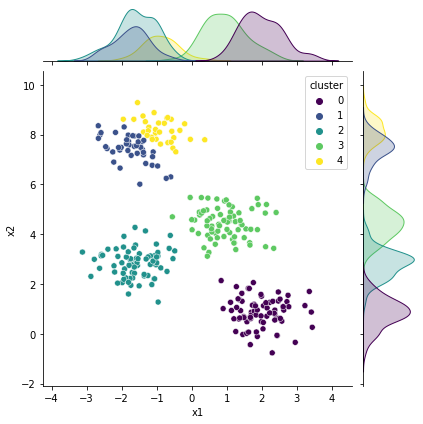


Inercia com k=5: 188.77323556773712






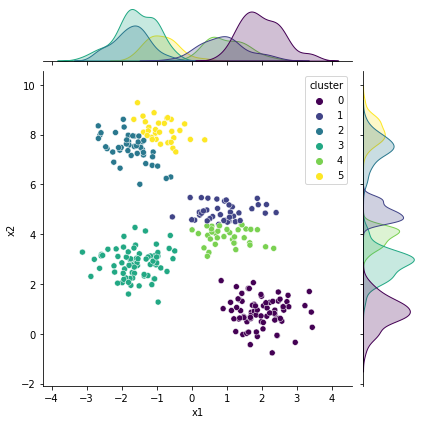


Inercia com k=6: 170.8031304116843






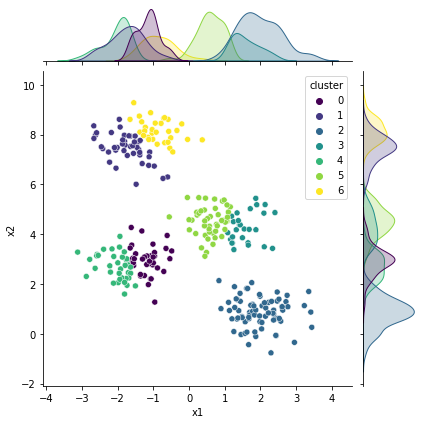


Inercia com k=7: 154.1127695986189






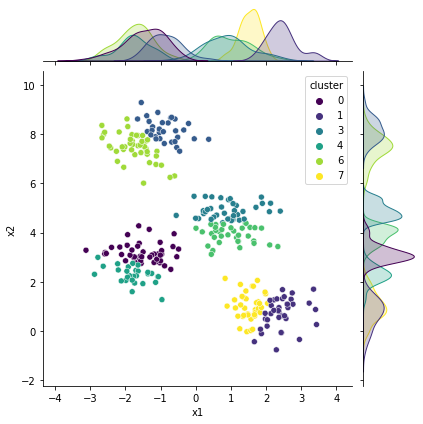


Inercia com k=8: 137.8917892457865






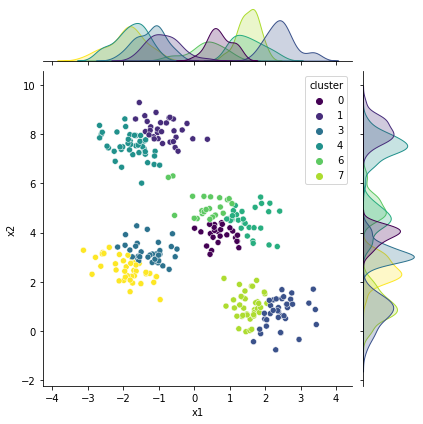


Inercia com k=9: 124.55475973344444






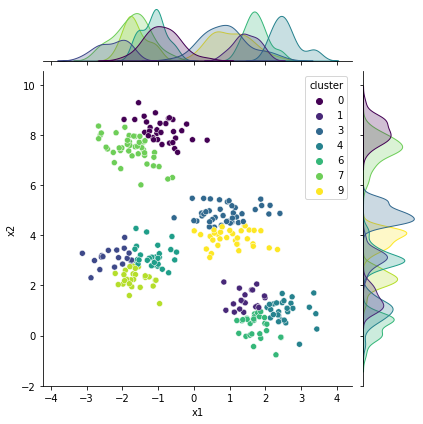


Inercia com k=10: 112.47657573645117






In [102]:
# só pra visualizar...

inercia = []

lista_k = list(range(1, 11))

for k in lista_k:
    
    estimador = KMeans(n_clusters=k, max_iter=1000)

    modelo = estimador.fit(X)

    labels = modelo.predict(X)

    dados_clusterizados = pd.concat([pd.DataFrame(X, columns=["x1", "x2"]), 
                                     pd.Series(labels, name="cluster")], axis=1)

    sns.jointplot(data=dados_clusterizados, x="x1", y="x2", hue="cluster", palette="viridis")
    
    plt.show()

    print(f"\nInercia com k={k}: {modelo.inertia_}")
    
    inercia.append(modelo.inertia_)
    
    print("\n")
    print("="*50)
    print("\n")

In [103]:
# inicializamos uma lista vazia para armazenar a inercia de cada modelo com um k diferente
# a inercia é a soma dos quadrados das distâncias dos pontos ao cluster mais próximo, e funciona como uma espécie de erro.
inercias = []

# criamos um iterável para os valores de k que vamos testar. Neste caso, testaremos de 1 a 10
lista_k = list(range(1, 11))

# aqui vamos fitar o modelo e atualizar nossa lista de inercias, apendando a inercia à lista
# a inercia é obtida com o atributo .inertia_ do modelo treinado!
for k in lista_k:
    
    estimador = KMeans(n_clusters=k, max_iter=1000)

    modelo = estimador.fit(X)
    
    inercias.append(modelo.inertia_)

In [104]:
lista_k

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [105]:
inercias

[2812.137595303235,
 1190.782359364345,
 546.8911504626301,
 212.00599621083472,
 188.77323556773712,
 170.797241647921,
 153.55499916509095,
 136.6964533722784,
 124.98370353988649,
 113.77816728170491]

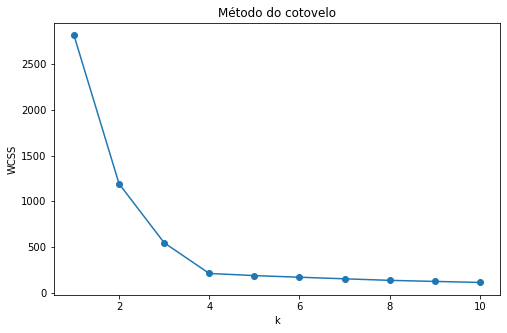

In [106]:
# Aqui plotamos a inercia em função do k!

plt.figure(figsize=(8, 5))

plt.plot(lista_k, inercias, marker="o")

plt.title("Método do cotovelo")

plt.xlabel("k")
plt.ylabel("WCSS")

plt.show()

In [116]:
def calc_inercias(X, lista_k):
    
    # inicializamos uma lista vazia para armazenar a inercia de cada modelo com um k diferente
    # a inercia é a soma dos quadrados das distâncias dos pontos ao cluster mais próximo, e funciona como uma espécie de erro.
    inercias = []

    # aqui vamos fitar o modelo e atualizar nossa lista de inercias, apendando a inercia à lista
    # a inercia é obtida com o atributo .inertia_ do modelo treinado!
    for k in lista_k:
    
        estimador = KMeans(n_clusters=k, max_iter=1000)

        modelo = estimador.fit(X)

        inercias.append(modelo.inertia_)
    
    return inercias
    
def plot_cotovelo(X, lista_k):
    
    inercias = calc_inercias(X, lista_k)
    
    plt.figure(figsize=(8, 5))

    plt.plot(lista_k, inercias, marker="o")

    plt.title("Método do cotovelo")

    plt.xlabel("k")
    plt.ylabel("WCSS")

    plt.show()

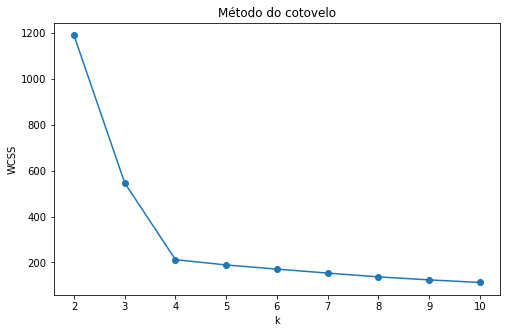

In [117]:
plot_cotovelo(X, lista_k=list(range(2, 11)))

O valor de $k$ mais adequado é aquele em que o gráfico tem uma "quina" bem abrupta: no exemplo acima, $k = 4$, como já sabíamos!

_______

### Método da silhueta

Um método alternativo ao método do cotovelo para o cálculo do número adequado de clusters é o método da silhueta.

Neste método, é calculado para cada ponto um score conhecido como **coeficiente de silhueta**, que é dado por:

$s = \frac{b - a}{max(a, b)} \ , $

onde:

- $a$ é a **distância média entre um dado ponto e os pontos de seu próprio cluster**. Portanto, essa é uma medida de **similaridade entre um ponto e seu cluster**;
- $b$ é a **distância média entre um dado ponto e os pontos do cluster mais próximo (em ser o próprio).** Portanto, essa é uma medida de **dissimilaridade entre um ponto e os demais clusters**;

Graficamente:

<img src=https://miro.medium.com/max/712/1*cUcY9jSBHFMqCmX-fp8BvQ.jpeg width=400>

Note que $-1 < s < 1$, sendo mais próximo de $1$ quando um ponto está no cluster correto ($a \ll b$); e mais próximo de $-1$ quando um ponto está no custer errado ($b \gg a$).

Na prática, é costumeiro olhar para **a média do coeficiente $s$ para todos os pontos, denotado $\bar{s}$**, e apresentar uma única métrica. A ideia é que se, em média, tivermos pontos em clusters corretos, teremos $\bar{s} \rightarrow 1$; enquanto, se em média tivermos muitos pontos em clusters incorretos, teremos $\bar{s} \rightarrow -1$.

Este score é calculado com a função [silhouette_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) do sklearn.

Uma vez que é possível calcularmos o score para um dado $k$, a decisão sobre o melhor $k$ segue similar ao método do cotovelo: basta calcular o score de silhueta para vários valores de $k$, e selecionar aquele que dá **a silueta mais próxima de $1$**!

Isto é facilmente feito:

In [ ]:
# inicializamos uma lista vazia para armazenar a inercia de cada modelo com um k diferente
# a inercia é a soma dos quadrados das distâncias dos pontos ao cluster mais próximo, e funciona como uma espécie de erro.

# criamos um iterável para os valores de k que vamos testar. Neste caso, testaremos de 1 a 10
lista_k = list(range(1, 11))

# aqui vamos fitar o modelo e atualizar nossa lista de inercias, apendando a inercia à lista
# a inercia é obtida com o atributo .inertia_ do modelo treinado!


In [107]:
# importando a função da silueta
from sklearn.metrics import silhouette_score

# lista vazia pra guardar os scores
silhouete_scores = []

# intervalo de k's a serem testados (pelo menos 2 clusters!)
lista_k = list(range(2, 11))

# iterando e guardando as silhuetas
for k in lista_k:

    estimador = KMeans(n_clusters=k, max_iter=1000)

    modelo = estimador.fit(X)

    silhouete_scores.append(silhouette_score(X, modelo.labels_))

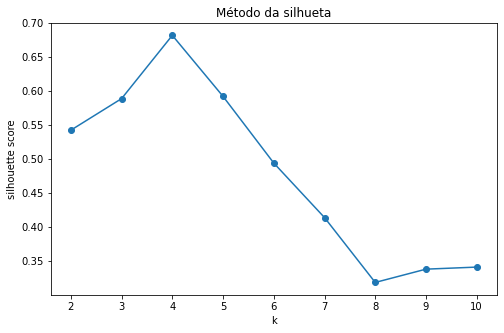

In [108]:
# Aqui plotamos a silhueta em função do k!

silhouete_scores = silhueta(X, lista_k)

plt.figure(figsize=(8, 5))

plt.plot(lista_k, silhouete_scores, marker="o")

plt.title("Método da silhueta")

plt.xlabel("k")
plt.ylabel("silhouette score")

plt.show()

In [109]:
def calc_silhueta(X, lista_k):

    # importando a função da silueta
    from sklearn.metrics import silhouette_score

    # lista vazia pra guardar os scores
    silhouete_scores = []

    # iterando e guardando as silhuetas
    for k in lista_k:

        estimador = KMeans(n_clusters=k, max_iter=1000)

        modelo = estimador.fit(X)

        silhouete_scores.append(silhouette_score(X, modelo.labels_))
        
    return silhouete_scores

In [113]:
def plot_silhueta(X, lista_k):
    
    # Aqui plotamos a silhueta em função do k!
    
    silhouete_scores = calc_silhueta(X, lista_k)

    plt.figure(figsize=(8, 5))

    plt.plot(lista_k, silhouete_scores, marker="o")

    plt.title("Método da silhueta")

    plt.xlabel("k")
    plt.ylabel("silhouette score")

    plt.show()

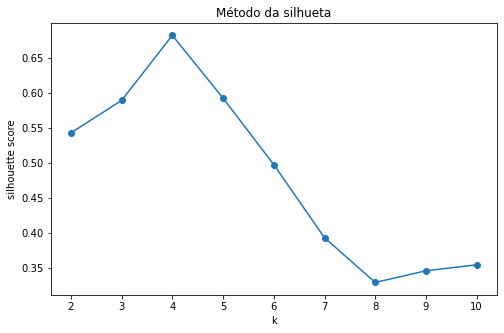

In [114]:
plot_silhueta(X, lista_k=list(range(2, 11)))

Aqui novamente, fica claro que o ideal é $k=4$!

Para entender o porquê do método receber o nome "silueta", podemos utilizar o seguinte código do sklearn:

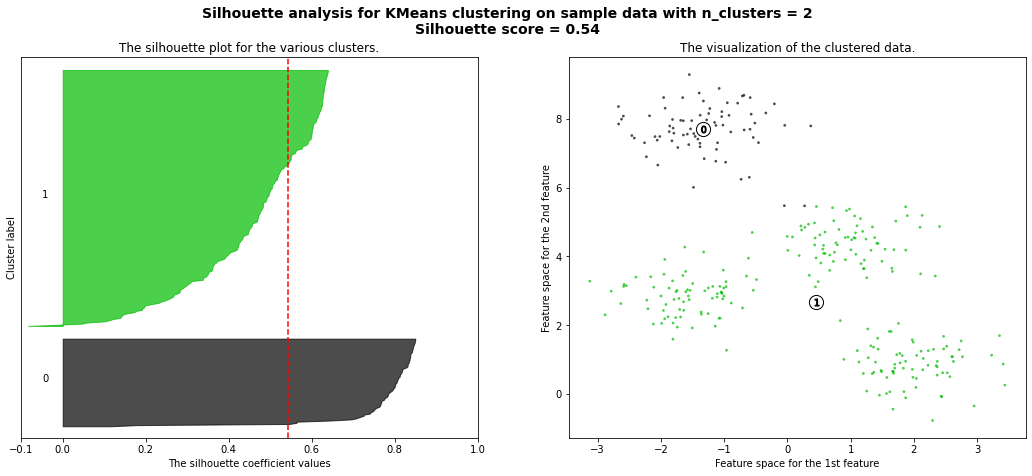

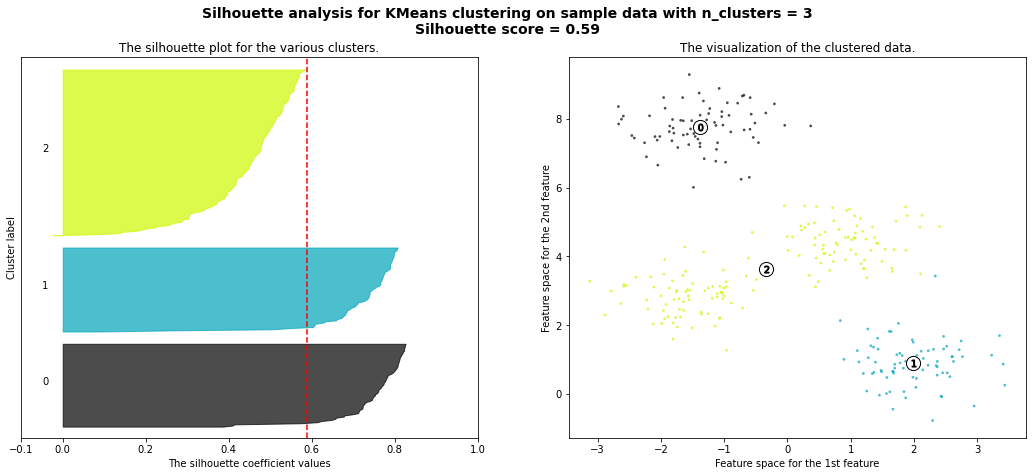

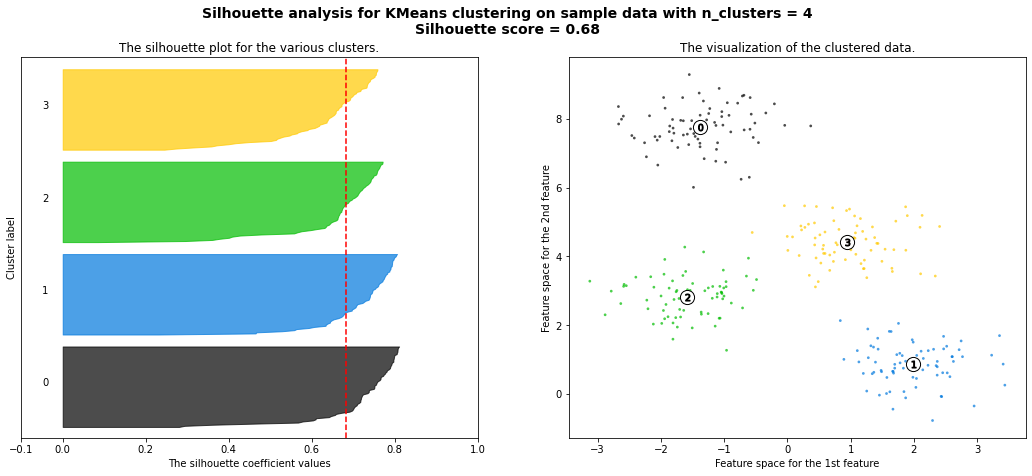

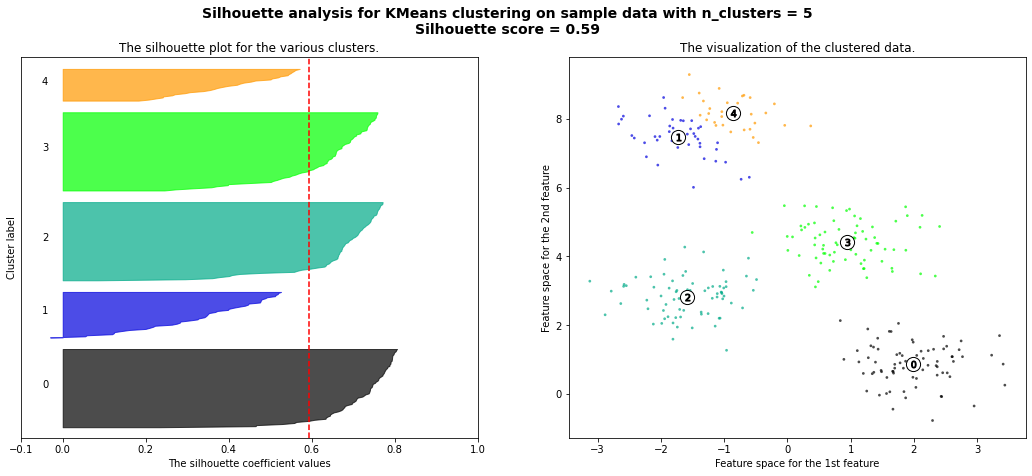

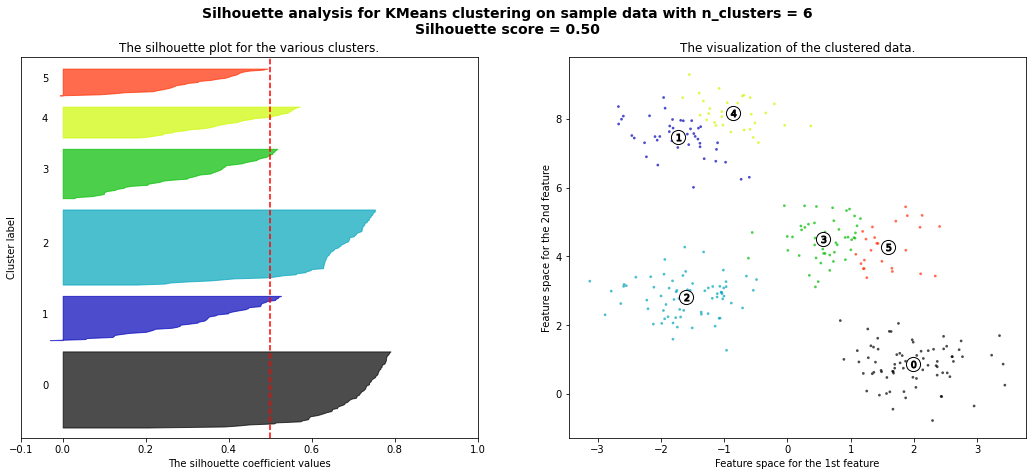

In [76]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    title = "Silhouette analysis for KMeans clustering on sample data "
    title += "with n_clusters = {}\nSilhouette score = {:.2f}".format(n_clusters, silhouette_avg)
    plt.suptitle(title, fontsize=14, fontweight='bold')

    plt.show()
    
    print("\n\n")

Na prática, é recomendável usar ambos os métodos, do cotovelo e da silhueta, pra apoiar a tomada de decisão quanto ao valor adequado de $k$.

No entanto, lembre-se: sempre que possível, guie esta decisão segundo o contexto do problema de negócio!

___

### Vamos fazer o exemplo com mais features

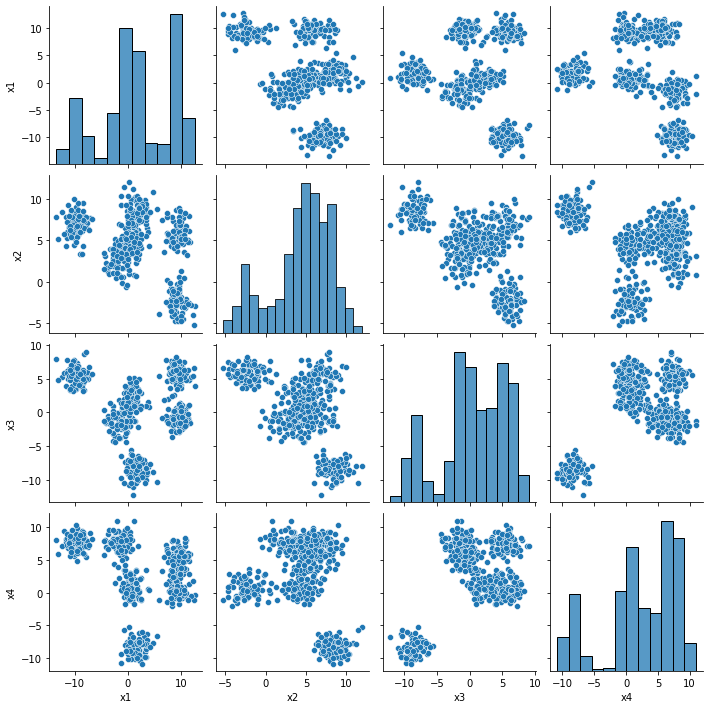

In [118]:
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=500, n_features=4, centers=6, cluster_std=1.3, random_state=0)

df = pd.DataFrame(X, columns=["x1", "x2", "x3", "x4"])

sns.pairplot(data=df)

**Aplicando o método do cotovelo...**

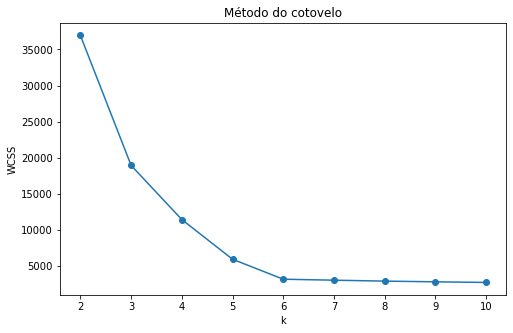

In [119]:
# método do cotovelo

plot_cotovelo(X, lista_k=list(range(2, 11)))

In [151]:
ista_k=list(range(2, 11))

inercias = calc_cotovelo(X, lista_k)

In [152]:
inercias

[36945.52037895387,
 18939.35874582769,
 11435.921601279277,
 5940.551392449685,
 3176.2079517556517,
 3040.550930411736,
 2912.317482022214,
 2829.1834398102555,
 2737.990795152316]

In [153]:
inercias = pd.Series(inercias, index=lista_k)

In [154]:
inercias

2     36945.520379
3     18939.358746
4     11435.921601
5      5940.551392
6      3176.207952
7      3040.550930
8      2912.317482
9      2829.183440
10     2737.990795
dtype: float64

In [155]:
inercias_change = inercias.pct_change().dropna()

inercias_change

3    -0.487371
4    -0.396182
5    -0.480536
6    -0.465334
7    -0.042710
8    -0.042174
9    -0.028546
10   -0.032233
dtype: float64

In [156]:
inercias_change > -0.05

3     False
4     False
5     False
6     False
7      True
8      True
9      True
10     True
dtype: bool

In [159]:
# decisão analítica pelo cotovelo (precisa de um threshold (no nosso caso, 5%))
inercias_change[inercias_change > -0.05].index[0] - 1

6

**Aplicando o método da silhueta...**

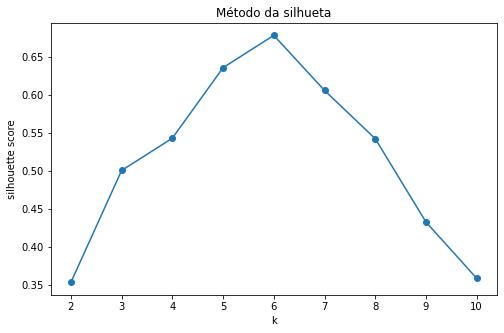

In [120]:
# método da silhueta

plot_silhueta(X, lista_k=list(range(2, 11)))

In [162]:
ista_k=list(range(2, 11))

silhuetas = calc_silhueta(X, lista_k)

In [163]:
silhuetas

[0.35327560741655706,
 0.5005011944115217,
 0.5429554262693239,
 0.6356763088785118,
 0.6782145970566315,
 0.6051660575480501,
 0.5283642564330792,
 0.45804835948299083,
 0.3697841197265464]

In [164]:
silhuetas = pd.Series(silhuetas, index=lista_k)

silhuetas

2     0.353276
3     0.500501
4     0.542955
5     0.635676
6     0.678215
7     0.605166
8     0.528364
9     0.458048
10    0.369784
dtype: float64

In [165]:
# decisão analítica pela silhueta

silhuetas.idxmax()

6

**Vamos tentar separadamente $k=6$**

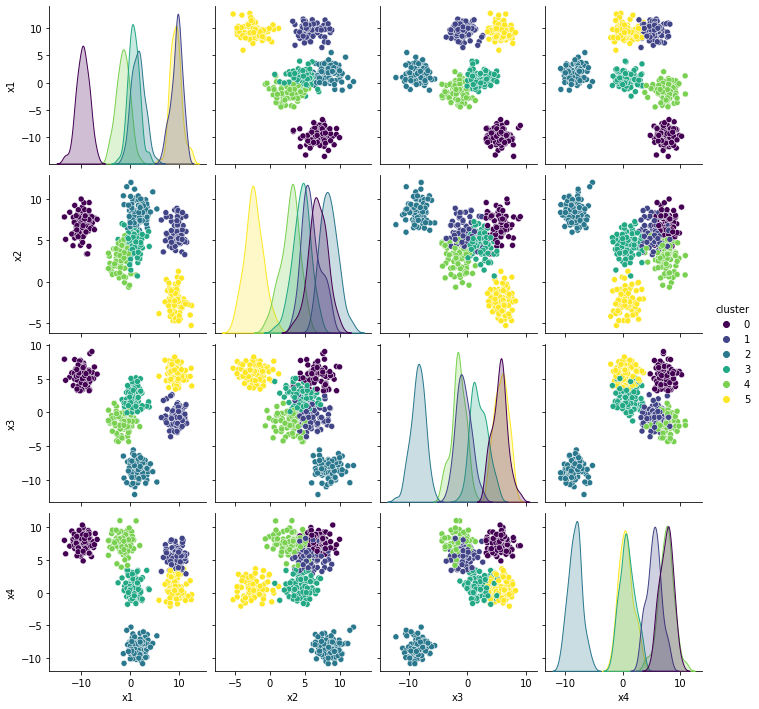

In [167]:
# treine o modelo, junte as labels em um dataframe e use o pairplot com o hue
# k=6

estimador = KMeans(n_clusters=6, max_iter=1000)

modelo = estimador.fit(X)

labels = modelo.predict(X)

dados_clusterizados = pd.concat([pd.DataFrame(X, columns=["x1", "x2", "x3", "x4"]), 
                                 pd.Series(labels, name="cluster")], axis=1)

sns.pairplot(data=dados_clusterizados, hue="cluster", palette="viridis")

plt.show()

As projeções em duas dimensões mostram que $k=6$ de fato é a melhor escolha! (O que faz sentido, pois nossos dados artificiais foram preparados para conter 6 clusters!)

____

### E como o k-means funciona?

Uma vez escolhido o número de clusters, o k-means segue as seguintes etapas:

- 1) k pontos são escolhidos aleatoriamente como sendo os centroides dos clusters (centroide é o centro do cluster);

- 2) Para cada ponto, vamos calcular qual é a distância entre ele e os k centroides. Aquele centroide que estiver mais perto, será o cluster ao qual este ponto pertencerá. Fazemos isso para todos os pontos!

- 3) Ao fim do passo 2, teremos k clusters, cada um com seu centroide, e todos os pontos pertencerão a determinado cluster!

- 4) Uma vez que temos os clusters, calculamos qual é de fato o centro de cada um deles. Isso é feito tomando a média da posição de todos os pontos;

- 5) Após determinar os novos k centroides, repetimos o processo!

- 6) E o processo se repete até que os centroides não mudem mais. Quando esta convergência for alcançada (ou após o número determinado de iterações), o algoritmo termina!

<img src="https://stanford.edu/~cpiech/cs221/img/kmeansViz.png" width=700>

<img src="https://miro.medium.com/max/1280/1*rwYaxuY-jeiVXH0fyqC_oA.gif" width=500>

<img src="https://miro.medium.com/max/670/1*JUm9BrH21dEiGpHg76AImw.gif" width=500>

_____

### **Quando uso algoritmos de clusterização, e em que casos eles não são uma boa ideia?**


De certa fora, algoritmos de clusterização podem ser vistos como classificadores, uma vez que os clusters podem caracterizar um grupo, ou uma classe.

No entanto, há uma diferença bem importante entre problemas de classificação e clusterização:

- **Problemas de classificação** são **supervisionados**, isto é, as amostras de treino que utilizamos têm tanto as features como os **targets**. Em outras palavras, neste tipo de problema, sabemos de antemão quais são as classes de interesse - Isto é, temos $\{\vec{x}_i, y_i \}_{i=1}^N$; <br><br>

- **Problemas de clusterização**, por outro lado, são **não-supervisionados**. Ou seja, a amostra **não contêm** targets, temos apenas as features! O nosso objetivo é justamente descobrir **alguma estrutura de agrupamento** nos dados, mas sem qualquer informação prévia quanto aos grupos a serem formados.

Foi exatamente o caso do nosso exemplo: nós tínhamos apenas as **features** dos dados, e **nenhuma** informação quanto aos grupos que seriam formados.

Foi só depois que fizemos a análise exploratória dos dados (plot), que pudemos identificar alguma estrutura (4 clusters), para então aplicar o k-means!

No segundo caso, só pudemos determinar o número de clusters de forma segura utilizando o **método do cotovelo**.

Assim sendo, via de regra, a utilização ou não de algoritmos de clusterização, além do tipo de problema, depende dos **dados disponíveis**!

Além do k-means, há outros algoritmos de clusterização que são muito utilizados, e que se baseiam em princípios bem diferentes do k-means.

Na aula que vem, olharemos para um algoritmo bem importante: [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN).

____
____
____